In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%autosave 1

data_path = os.path.join(os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), "data")
fig_path = os.path.join(os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), "figs")

def alpha(t, tau=1): return 1/tau**2*t*np.exp(-t/tau)

In [2]:
# spk_100_weights = np.loadtxt(os.path.join(data_path, "spk_train_weights_100.txt"))
def load_spk_train(N=128, Nt=2000000):
    with open(os.path.join(data_path, f"spk_train_{N}_{Nt}.pickle"), "rb") as f:
        spk_train = pickle.load(f)
    return spk_train

# spk_weights = load_spk_train().weight_matrix

In [18]:
spk_weights

array([[ 0.00000000e+00, -5.36441895e-02, -0.00000000e+00, ...,
         0.00000000e+00, -1.60692280e-01, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  8.18323678e-02, ...,
        -1.98198286e-01, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  4.98738921e-02],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.48892135e-02,  8.73070807e-05, ...,
         1.33513627e-01,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [15]:
(850//128, 850%128)

(6, 82)

In [16]:
spk_weights = load_spk_train().weight_matrix
np.argmax(spk_weights)
spk_weights[82, 6]

-0.00028226408495203895

Text(0.5, 1.0, 'J_00')

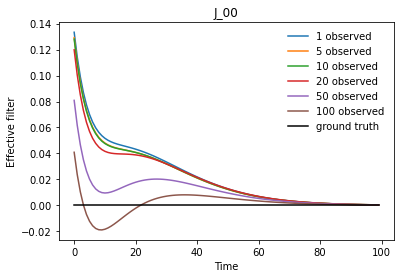

In [9]:
for obs in [1, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J00_basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")
plt.plot(np.zeros_like(filter), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_01')

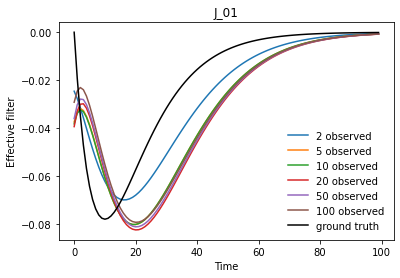

In [23]:
for obs in [2, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J01_basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")

plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")

Text(0.5, 1.0, 'J_01')

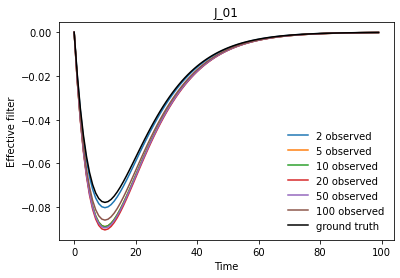

In [6]:
for obs in [2, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J01_1basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")

plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")

In [ ]:
# to do:

# use different amount data in spike train [200000, ..., 2000000], see if convergence happens when more data is used in inference

# check if ground truth can be recovered exactly, if resrict the use of basis to t*exp(-t); check timescale match

# go to network of 1024 neurons; 256 neurons; log plot even spaced; memory issue

# change the strength of J0: [0.25, 0.5, 0.75, 0.9]; weak synapse case std ~/N for J0 = 0.9 for Fig 5 in hidden neuron paper; keep sparsity 0.3

# covariance plot compared to inferred filters; similarity analysis

# acausal filter for less observed network


In [3]:
spk_train.spike_train[100000:120000,:]

NameError: name 'spk_train' is not defined

(array([[19575.,     0.,     0., ...,     0.,     0.,     0.],
        [19854.,     0.,     0., ...,     0.,     0.,     0.],
        [19595.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [19407.,     0.,     0., ...,     0.,     0.,     0.],
        [19237.,     0.,     0., ...,     0.,     0.,     0.],
        [19633.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 128 BarContainer objects>)

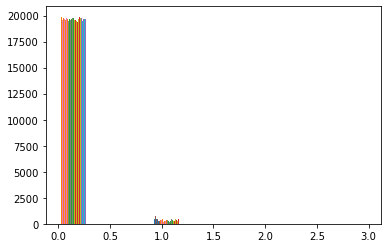

In [6]:
plt.hist(spk_train.spike_train[100000:120000,:])

In [10]:
spk_train.spike_time[0][::-1]

[99999.45000000001,
 99999.20000000001,
 99998.8,
 99995.35,
 99987.5,
 99987.40000000001,
 99987.15000000001,
 99983.65000000001,
 99982.90000000001,
 99982.75,
 99979.70000000001,
 99979.1,
 99973.05,
 99969.75,
 99969.40000000001,
 99969.1,
 99966.95000000001,
 99965.70000000001,
 99964.5,
 99964.0,
 99962.95000000001,
 99961.1,
 99959.95000000001,
 99959.6,
 99957.70000000001,
 99954.3,
 99954.15000000001,
 99954.05,
 99950.55,
 99950.1,
 99949.65000000001,
 99945.95000000001,
 99940.1,
 99938.35,
 99934.85,
 99932.6,
 99930.0,
 99926.95000000001,
 99926.55,
 99925.1,
 99924.8,
 99922.70000000001,
 99921.95000000001,
 99921.90000000001,
 99919.35,
 99917.40000000001,
 99916.95000000001,
 99916.20000000001,
 99914.8,
 99914.3,
 99914.20000000001,
 99910.75,
 99908.5,
 99908.15000000001,
 99906.3,
 99904.05,
 99903.55,
 99896.8,
 99895.3,
 99891.90000000001,
 99888.05,
 99886.85,
 99885.45000000001,
 99883.35,
 99882.8,
 99882.40000000001,
 99882.15000000001,
 99882.0,
 99881.85,
 99

[8000, 8050]
[3488, 1255, 3172, 2294, 4360, 5774, 3131, 2343, 4423, 3374, 3563, 2012, 6370, 4220, 3058, 3218, 2787, 7807, 3682, 5392, 1980, 3638, 4665, 2146, 3032, 1700, 1886, 2528, 6004, 2664, 2835, 2947, 2740, 3595, 2404, 3908, 3017, 4385, 2784, 3377, 3708, 3618, 2904, 3943, 1993, 2487, 1562, 2959, 1915, 2621, 3058, 2442, 2968, 3896, 3382, 4275, 1823, 2026, 2205, 5684, 1740, 2546, 1910, 3402, 5594, 5211, 2159, 3127, 4045, 3531, 3179, 4068, 2511, 3290, 2561, 3290, 4363, 1276, 4494, 2505, 3385, 3661, 2291, 4984, 1270, 2745, 2285, 3305, 2774, 4192, 3075, 4799, 3003, 1245, 4782, 2173, 5307, 2518, 2179, 3748, 3443, 2899, 1400, 2350, 1866, 3075, 4526, 2171, 3486, 4117, 3181, 3261, 1799, 3171, 3490, 3448, 2826, 976, 2350, 2552, 3047, 3880, 2746, 4195, 2701, 4772, 6292, 2688]
[3508, 1267, 3191, 2306, 4390, 5810, 3150, 2358, 4458, 3398, 3590, 2028, 6406, 4247, 3082, 3239, 2806, 7841, 3699, 5433, 1992, 3657, 4695, 2157, 3058, 1716, 1904, 2540, 6038, 2686, 2852, 2965, 2753, 3619, 2425, 3935, 30

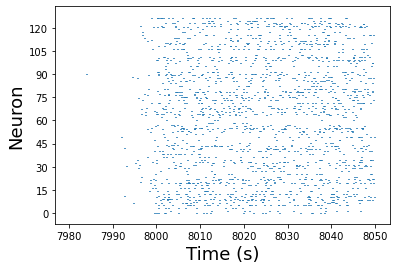

In [15]:
# raster plot

spk_train = load_spk_train()
spk_train.plot_raster(t_window=[8000,8050])

Text(0.5, 1.0, 'J_00')

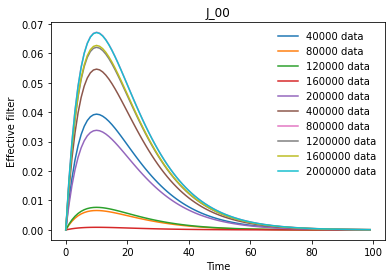

In [22]:
# 128 neurons; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons-J00", f"1_basis_128_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_11')

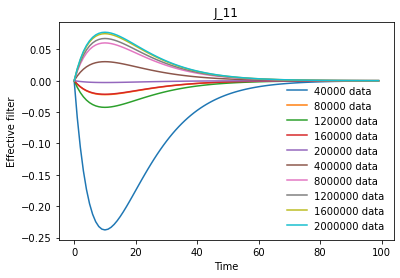

In [23]:
# 128 neurons; J11; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07", f"1_basis_128_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_11")

Text(0.5, 0, 'Data volume')

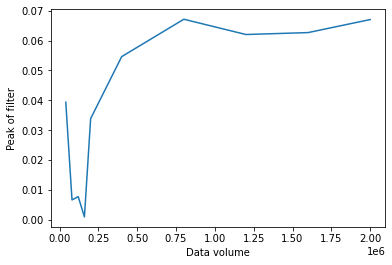

In [7]:
# 128 neurons; different amount of data, peak change as a function of data volume
peak = []
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons-J00", f"1_basis_128_observed_{Nt}_data.txt"))
    peak.append(np.max(filter))

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.plot([int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]], peak)
# plt.xscale('log')
plt.ylabel("Peak of filter")
plt.xlabel("Data volume")

Text(0.5, 1.0, 'J_00')

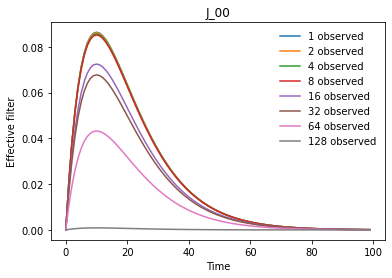

In [10]:
# 128 neurons; different number of observed neurons; data 160000, more data leads to more deviation
for obs in [2**i for i in range(8)]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons", f"1_basis_{obs}_observed_160000_data.txt"))
    plt.plot(filter, label=f"{obs} observed")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_00')

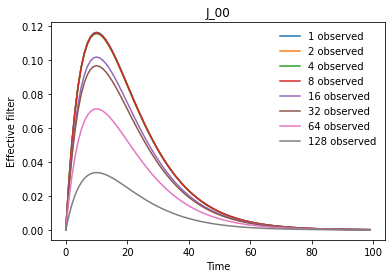

In [4]:
# 128 neurons; different number of observed neurons; data 200000, more data leads to more deviation
for obs in [2**i for i in range(8)]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons", f"1_basis_{obs}_observed_200000_data.txt"))
    plt.plot(filter, label=f"{obs} observed")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_00')

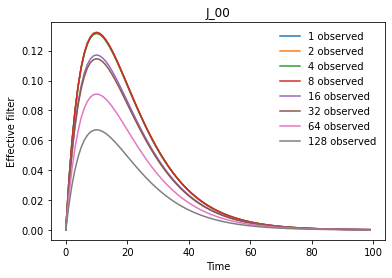

In [5]:
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for obs in [2**i for i in range(8)]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons", f"1_basis_{obs}_observed_2000000_data.txt"))
    plt.plot(filter, label=f"{obs} observed")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'C_00')

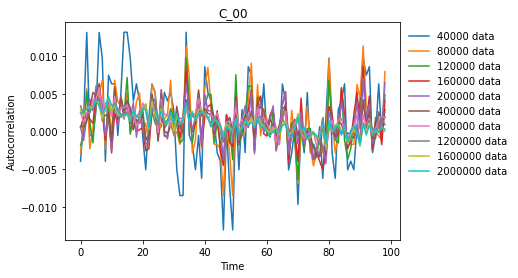

In [17]:
# 128 neurons; autocorrelation of neuron 0 with different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07-128neurons-correlation-C00", f"correlation_{Nt}_data.txt"))
    plt.plot(filter[1:], label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False, bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title("C_00")

Text(0.5, 1.0, 'J_6_82')

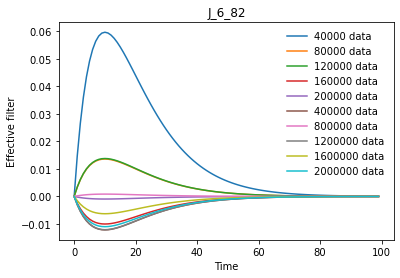

In [2]:
# 128 neurons; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07-128neurons-J82-6", f"1_basis_84_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_82_6")

Text(0.5, 1.0, 'J_6_82')

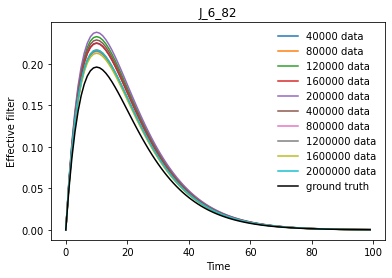

In [11]:
# 128 neurons; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07", f"1_basis_84_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

plt.plot(spk_weights[6, 82] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_6_82")

In [ ]:
# to do: 2022-07-07

# J11: does 160000 data points also give zero inferred filters? More data leads to deviation?
# 200000 closest to zero then deviate

# input driven regime vs. stochasticity driven regime in 2 neurons case
# identifiability of GLM; eigenvalues of Hessian at the point of optimal fit;
# First, block neuron connections, spontaneous activity with self-history filter, infer the self-connection and bias first
# then, use the inferred self-connection and bias in full network inference with neuron interactions


Autosaving every 2 seconds


In [ ]:
gbf

In [ ]:
cvb